<img style="float: left;" src="earth-lab-logo-rgb.png" width="150" height="150" />

# Earth Analytics Education - Climate 101 Workshop

## Interactive Data Activity: Subset Data by Spatial Location

This notebook demonstrates the capabilities of using **Python** to work with climate data. You will be using packages such as **xarray** to open and manipulate climate data into a meaningful graph. 

In [1]:
# Import packages
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rioxarray
import xarray as xr
import regionmask
import geopandas as gpd
import earthpy as et

# Plotting options
sns.set(font_scale=1.3)
sns.set_style("white")

In [2]:
# Setting the working dir with your data
ea_path = os.path.join(et.io.HOME, 'earth-analytics', 'data')

if not os.path.exists(ea_path):
    os.makedirs(ea_path)

os.chdir(ea_path)

## Challenge 1 - Select Your Data

Similar to the previous activity, you will first select the data you wish to work  with.

The data you are using is a monthly summary of lots of meteorological data, such as precipitation, air temperature, and more. The data has been downscaled from CMIP5 data using one of many climate models. 

Below, you will assign three python variables that will setup what data are downloaded
for analysis in this notebook. 

* `model = ` can be set to any number between 0 and 19. You can see the list of models you are choosing from in the cell two below this one. The models are listed after `model_name = ` All of the models are different models for how the climate will change going into the future. There are 20 options for models, and to pick one you can assign `model = ` to any number between 0 and 19, where 0 is the first option in the list, and 19 is the last. 

* `var = ` is the variable in the dataset you want to be analyzed. You can see the variables in the cell two below this one. The variables are listed after `var_long_name = `. The variables are as described by the variable name, so `air_temperature` is the aggregate air temperature for each month, for example. There are 9 options for variables, and to pick one you can assign `var = ` to any number between 0 and 8, where 0 is the first option in the list, and 8 is the last. 

* `scenario = ` represents which climate scenario you want to pull your data from. `0` is the historical data and doesn't include any modeling. `1` is the `rcp45` scenario, which is described as an intermediate climate scenario. `2` is the `rcp85` scenario, which is a worst case (emissions) climate scenario. 

In [3]:
# Model options between 0-19
model = 2
# Options 0-8 will work for var. Var maps to the variable name below
var = 4
# Options range from 0-2
scenario = 1

In [4]:
dir_path = 'http://thredds.northwestknowledge.net:8080/thredds/dodsC/'

# These are the variable options for the met data
variable_name = ('tasmax',
                 'tasmin',
                 'rhsmax',
                 'rhsmin',
                 'pr',
                 'rsds',
                 'uas',
                 'vas',
                 'huss')

# These are var options in long form
var_long_name = ('air_temperature',
                 'air_temperature',
                 'relative_humidity',
                 'relative_humidity',
                 'precipitation',
                 'surface_downwelling_shortwave_flux_in_air',
                 'eastward_wind',
                 'northward_wind',
                 'specific_humidity')

# Models to chose from
model_name = ('bcc-csm1-1',
              'bcc-csm1-1-m',
              'BNU-ESM',
              'CanESM2',
              'CCSM4',
              'CNRM-CM5',
              'CSIRO-Mk3-6-0',
              'GFDL-ESM2G',
              'GFDL-ESM2M',
              'HadGEM2-CC365',
              'HadGEM2-ES365',
              'inmcm4',
              'IPSL-CM5A-MR',
              'IPSL-CM5A-LR',
              'IPSL-CM5B-LR',
              'MIROC5',
              'MIROC-ESM',
              'MIROC-ESM-CHEM',
              'MRI-CGCM3',
              'NorESM1-M')

# Scenarios
scenario_type = ('historical', 'rcp45', 'rcp85')

# Year start and ends (historical vs projected)
year_start = ('1950', '2006', '2006')
year_end = ('2005', '2099', '2099')
run_num = [1] * 20
run_num[4] = 6  # setting CCSM4 with run 6
domain = 'CONUS'

In [31]:
climate_variable = var_long_name[var]
print("\u2705 You have chosen to work with", climate_variable, "data")

✅ You have chosen to work with precipitation data


In [29]:
time = year_start[scenario]+'_' + year_end[scenario]
print("\u2705 Your selected time period is:", time)

✅ Your selected time period is: 2006_2099


In [33]:
# This is only going to provide monthly data
file_name = ('agg_macav2metdata_' +
             str(variable_name[var]) +
             '_' +
             str(model_name[model]) +
             '_r' +
             str(run_num[model])+'i1p1_' +
             str(scenario_type[scenario]) +
             '_' +
             time + '_' +
             domain + '_monthly.nc')

print("\u2705 You are accessing:\n", file_name, "\n data in netcdf format")

✅ You are accessing:
 agg_macav2metdata_pr_BNU-ESM_r1i1p1_rcp45_2006_2099_CONUS_monthly.nc 
 data in netcdf format


In [34]:
full_file_path = dir_path + file_name
print("\u2705 the url to your data is:", full_file_path)

✅ the url to your data is: http://thredds.northwestknowledge.net:8080/thredds/dodsC/agg_macav2metdata_pr_BNU-ESM_r1i1p1_rcp45_2006_2099_CONUS_monthly.nc


## Challenge 2 - Run the Cell Below to Open Your Data

Run the cell below to open your dataset using xarray.


In [35]:
# Open the data
with xr.open_dataset(full_file_path) as file_nc:
    climate_data_xr = file_nc

# View xarray object
climate_data_xr

<xarray.Dataset>
Dimensions:        (crs: 1, lat: 585, lon: 1386, time: 1128)
Coordinates:
  * lat            (lat) float64 25.06 25.1 25.15 25.19 ... 49.31 49.35 49.4
  * crs            (crs) int32 1
  * lon            (lon) float64 235.2 235.3 235.3 235.4 ... 292.9 292.9 292.9
  * time           (time) object 2006-01-15 00:00:00 ... 2099-12-15 00:00:00
Data variables:
    precipitation  (time, lat, lon) float32 ...
Attributes:
    description:                     Multivariate Adaptive Constructed Analog...
    id:                              MACAv2-METDATA
    naming_authority:                edu.uidaho.reacch
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    Metadata_Link:                   
    cdm_data_type:                   FLOAT
    title:                           Monthly aggregation of downscaled daily ...
    summary:                         This archive contains monthly downscaled...
    keywords:                        monthly, precipitation, maximum temperat...
    keywords_vocabulary:             
    standard_name_vocabulary:        CF-1.0
    history:                         No revisions.
    comment:                         Total daily precipitation at surface; in...
    geospatial_bounds:               POLYGON((-124.7722 25.0631,-124.7722 49....
    geospatial_lat_min:              25.0631
    geospatial_lat_max:              49.3960
    geospatial_lon_min:              -124.7722
    geospatial_lon_max:              -67.0648
    geospatial_lat_units:            decimal degrees north
    geospatial_lon_units:            decimal degrees east
    geospatial_lat_resolution:       0.0417
    geospatial_lon_resolution:       0.0417
    geospatial_vertical_min:         0.0
    geospatial_vertical_max:         0.0
    geospatial_vertical_resolution:  0.0
    geospatial_vertical_positive:    up
    time_coverage_start:             2091-01-01T00:0
    time_coverage_end:               2095-12-31T00:00
    time_coverage_duration:          P5Y
    time_coverage_resolution:        P1M
    date_created:                    2014-05-15
    date_modified:                   2014-05-15
    date_issued:                     2014-05-15
    creator_name:                    John Abatzoglou
    creator_url:                     http://maca.northwestknowledge.net
    creator_email:                   jabatzoglou@uidaho.edu
    institution:                     University of Idaho
    processing_level:                GRID
    project:                         
    contributor_name:                Katherine C. Hegewisch
    contributor_role:                Postdoctoral Fellow
    publisher_name:                  REACCH
    publisher_email:                 reacch@uidaho.edu
    publisher_url:                   http://www.reacchpna.org/
    license:                         Creative Commons CC0 1.0 Universal Dedic...
    coordinate_system:               WGS84,EPSG:4326

The cell below grabs the coordinate reference system for your data. 
This step is only important if you want to export geotiff raster files
at the end of your analysis. 

A geotiff file would make it easy to open up your outputs in a tool
such as ArcGis. 

In [36]:
# Grab the coordinate reference system for the data
climate_crs = climate_data_xr.rio.crs
climate_crs

CRS.from_wkt('GEOGCS["undefined",DATUM["undefined",SPHEROID["undefined",6378137,298.257223563]],PRIMEM["undefined",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]')

## Create a Spatial Subset

In the previous activity, you only selected a single point location
and plotted change in your selected climate variable over time. Here
you will subset the data using a spatial region.

First you will open up a dataset from the natural earth website containing
boundaries for all of the states in the United States.

In [37]:
# Download natural earth data which contains state boundaries to generate AOI
et.data.get_data(
    url="https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_1_states_provinces_lakes.zip")

states_path = "earthpy-downloads/ne_50m_admin_1_states_provinces_lakes"
states_path = os.path.join(
    states_path, "ne_50m_admin_1_states_provinces_lakes.shp")

states_gdf = gpd.read_file(states_path)
states_gdf.name

0      Western Australia
1     Northern Territory
2        South Australia
3             Queensland
4               Tasmania
             ...        
95               Vermont
96            Washington
97             Wisconsin
98         West Virginia
99               Wyoming
Name: name, Length: 100, dtype: object

## Challenge 3: Select the State AOI For Your Analysis

In this activity you are performing an analysis for a single state in the 
continental United States. Below the default state set is California.

However you can select any of hte states in the continental USA.
Change the state selection below to something other than California.


In [51]:
state = "California"
print("\u2705 Great you selected \U0001F929",
      state, "\U0001F929 for your analysis.")

✅ Great you selected 🤩 California 🤩 for your analysis.


In [54]:
cali_aoi = states_gdf[states_gdf.name == state]
# Get the total spatial extent for California
print("\u2705 The extent for your data subset is:", cali_aoi.total_bounds)

✅ The extent for your data subset is: [-124.37165376   32.53336527 -114.12501824   42.00076797]


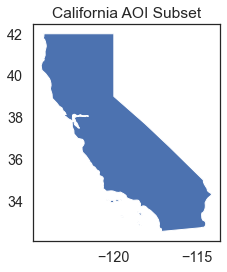

In [14]:
# This is the AOI of interest. You only want to calculate summary values for
# pixels within this AOI rather the entire rectangular spatial extent.
f, ax = plt.subplots()
cali_aoi.plot(ax=ax)
title = state + " AOI Subset"
ax.set(title=title)

plt.show()

### Get Data Extent for Spatial Subset

In the step below you convert the bounds for your selected
state into lat / lon values. This could be done with a simple
helper function if you want to do this over and over!

In [15]:
# Get lat min, max
aoi_lat = [float(cali_aoi.total_bounds[1]), float(cali_aoi.total_bounds[3])]
aoi_lon = [float(cali_aoi.total_bounds[0]), float(cali_aoi.total_bounds[2])]
# Notice that the longitude values have negative numbers
# we need these values in a global crs so we can subtract from 360
aoi_lat, aoi_lon

([32.533365269889316, 42.00076797479207],
 [-124.3716537616361, -114.12501823892204])

In [16]:
# The netcdf files use a global lat/lon so adjust values accordingly
aoi_lon[0] = aoi_lon[0] + 360
aoi_lon[1] = aoi_lon[1] + 360
aoi_lon

[235.62834623836392, 245.87498176107795]

### Create Mask Of Your Area of Interest (AOI)

In the step above you create a spatial extent. This extent
is a box representing the min and max x and y values for your
data. However, for this analysis you only want to include 
pixels that are contained within the actual boundary of 
your AOI which is a state boundary. 

Below, you create a mask using `regionmask`

In [55]:
state_mask = regionmask.mask_3D_geopandas(cali_aoi,
                                          climate_data_xr.lon,
                                          climate_data_xr.lat)
# Notice this is just a boolean (true / false) array
# Any values that are true are within your AOI
state_mask

<xarray.DataArray 'region' (region: 1, lat: 585, lon: 1386)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * lat      (lat) float64 25.06 25.1 25.15 25.19 ... 49.27 49.31 49.35 49.4
  * lon      (lon) float64 235.2 235.3 235.3 235.4 ... 292.8 292.9 292.9 292.9
  * region   (region) int64 53

## Challenge 4: Select a Temporal & Spatial Subset

In the previous challenge, you subsetted the data by time and for a single location.
Here you will select a time span to subset your data for. 

The code will use the state subset that you selected above to then subset the 
climate data for only the region of interest (the state) that you selected.
Modify the start and end date BUT make sure that the dates that you 
select are within the range of dates available in your data!

In [64]:
print("\u2705 The earliest time period in your data is: ",
      climate_data_xr.time.values.min())
print("\u2705 The latest time period in your data is: ",
      climate_data_xr.time.values.max())

✅ The earliest time period in your data is:  2006-01-15 00:00:00
✅ The latest time period in your data is:  2099-12-15 00:00:00


In [56]:
# Slice the data by time and spatial extent
start_date = "2010-01-15"
end_date = "2010-02-15"

### Subset Your Data By Time and Spatial Extent

Below you subset your data using the start and end time that you selected above
and also the extent latitude and longitude values that you extracted
from your area of interest (the state that you selected).

In [19]:
# Subset the data by time and aoi
climate_data_subset = climate_data_xr[climate_variable].sel(
    time=slice(start_date, end_date),
    lon=slice(aoi_lon[0], aoi_lon[1]),
    lat=slice(aoi_lat[0], aoi_lat[1]))
climate_data_subset

<xarray.DataArray 'precipitation' (time: 2, lat: 227, lon: 246)>
[111684 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 32.56 32.6 32.65 32.69 ... 41.85 41.9 41.94 41.98
  * lon      (lon) float64 235.6 235.7 235.7 235.8 ... 245.7 245.8 245.8 245.9
  * time     (time) object 2010-01-15 00:00:00 2010-02-15 00:00:00
Attributes:
    long_name:      Monthly Precipitation Amount
    units:          mm
    grid_mapping:   crs
    standard_name:  precipitation
    cell_methods:   time: sum(interval: 24 hours): sum over days
    comments:       Total monthly precipitation at surface: includes both liq...
    _ChunkSizes:    [ 10  44 107]

## Challenge 5 - Plot Data & Modify Plot Columns

If you want, modify the code below. See what happens when you set `col_wrap` to 2. 

What do you notice about the data below? Do you see data values (colors representing 
pixel values) ONLY for the state of California or do you see values for locations
outside of the state of california?

Any idea what is happening here?

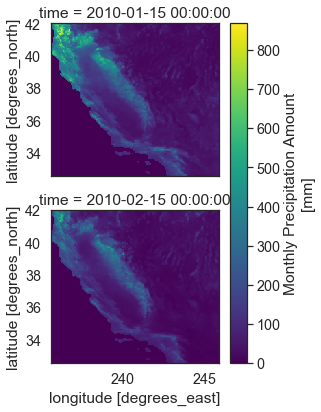

In [20]:
# You can adjust the col_wrap option below to specify how many columns you want
# In the plot below
climate_data_subset.plot(col="time",
                         col_wrap=1)
plt.show()

## Challenge 6 - Mask Your Data

The data in the plot above are still not subsetted to only include values
within the state of california. There is one last step to implement - masking 
the data using the mask that you created above.

Below you use the `.where()` method and the mask object that you created above to 
mask your data. 

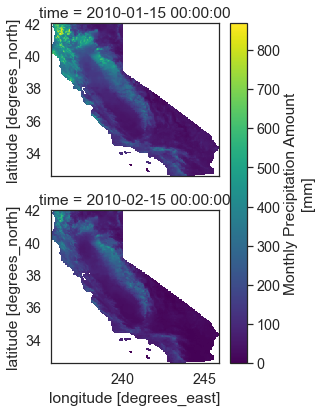

In [21]:
masked_data = climate_data_subset.where(state_mask)

masked_data.plot(col="time",
                 col_wrap=1)
plt.show()

## Challenge 7  - Export your data to a Geotiff File

As long as your subset doesn't contain too many layers, you can use rioxarray
to export  each raster above into a stacked geotiff file. If you only
want the data as a raster and don't need to do any additional processing,
you can simply export the data at this point using rioxarray.

Run the cells below to save the data as a raster file.
You will then open the data back up below to make sure
you saved it correctly.

In [22]:
# Add a crs to your subset (you are using the crs from the top of this notebook)
masked_data.rio.set_crs(climate_crs)
masked_data.rio.crs

CRS.from_wkt('GEOGCS["undefined",DATUM["undefined",SPHEROID["undefined",6378137,298.257223563]],PRIMEM["undefined",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]')

In [23]:
masked_data.shape

(2, 227, 246, 1)

In [24]:
#  This drops the 4th dimension which is region
masked_data[:, :, :, 0].shape

(2, 227, 246)

In [25]:
# Export to geotiff - note that because the data have a 4th dimension (a region)
# we are subsetting the data using
masked_data[:, :, :, 0].rio.to_raster('subset_climate_raster_data.tif')

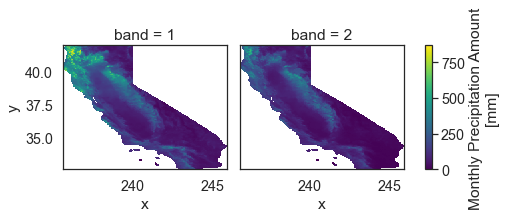

In [26]:
# Open the data up as a geotiff and plot the data!
saved_raster = xr.open_rasterio('subset_climate_raster_data.tif')
saved_raster.plot(col="band")
plt.show()

##  Congratulations!!

You have successfully subsetted a dataset by an aoi and  exported it as a raster.